In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
n_samples = 1000

X = np.concatenate((
    np.random.normal((-2, -2), size=(n_samples, 2)),
    np.random.normal((2, 2), size=(n_samples, 2)),
    np.random.normal((-4, 4), size=(n_samples, 2))
))

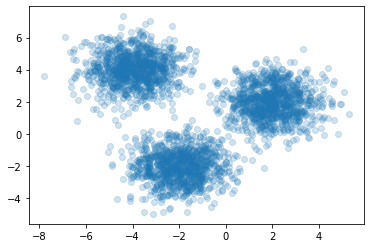

In [3]:
plt.scatter(X[:,0], X[:,1], alpha=0.2)
plt.show()

In [4]:
def dist_euclide(x, y):
    return np.linalg.norm(x - y, axis=1)

def k_means(X, nb_centers, threshold=1e-3):
    # Initialize random cluster centers
    centers = X[:nb_centers]
    
    while True:
        # Assign points to clusters
        y = []
        for p in X:
            y.append(dist_euclide(p, centers).argmin())
        y = np.asarray(y)

        # Recalculate centers
        new_centers = centers.copy()
        for c in range(nb_centers):
            mask = y == c
            new_centers[c] = X[mask].mean(axis=0)

        # Stop if centers are stable
        if (dist_euclide(centers, new_centers) < threshold).all():
            return new_centers, y

        centers = new_centers

# Validity index for nb_clusters
def silhouette(X, y):
    s = []
    
    for p in range(len(X)):
        i = y[p]
        Ci = X[y == i]
        a = sum(dist_euclide(X[p], Ci)) / (len(Ci) - 1)

        bj = []
        for j in np.unique(y):
            if j != i:
                Cj = X[y == j]
                bj.append(sum(dist_euclide(X[p], Cj)) / len(Cj))
        b = min(bj)
        
        s.append((b - a) / max(a, b))
    
    return np.asarray(s).mean()

In [5]:
ss = []
best_s = -1

np.random.shuffle(X)

for k in tqdm(range(2, 11)):
    centers, y = k_means(X, k)
    
    if silhouette(X, y) > best_s:
        best_centers, best_y, best_k = centers, y, k
        best_s = silhouette(X, y)
    ss.append(silhouette(X, y))

100%|█████████████████████████████████████████████| 9/9 [00:35<00:00,  3.91s/it]


In [6]:
print("Best centers:", best_centers)
print("Best y:", best_y)
print("Best k:", best_k)

Best centers: [[-3.94535797  4.0381506 ]
 [-1.97941175 -2.04751828]
 [ 1.98538497  1.9758865 ]]
Best y: [0 1 2 ... 0 1 1]
Best k: 3


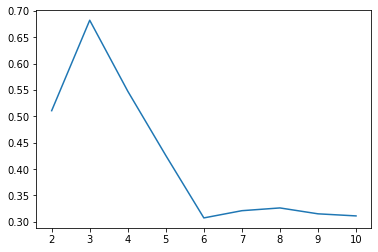

In [7]:
plt.plot(range(2, 11), ss)
plt.show()

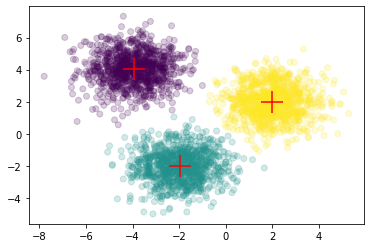

In [8]:
plt.scatter(X[:,0], X[:,1], alpha=0.2, c=best_y)
plt.scatter(best_centers[:,0], best_centers[:,1], marker="+", s=500, c='r')
plt.show()

## FCM

In [9]:
from fcmeans import FCM

In [10]:
ss = []
best_s = -1

np.random.shuffle(X)

for k in tqdm(range(2, 11)):
    fcm = FCM(n_clusters=k)
    fcm.fit(X)
    centers = fcm.centers
    y = fcm.predict(X)
    
    if silhouette(X, y) > best_s:
        best_centers, best_y, best_k = centers, y, k
        best_s = silhouette(X, y)
    ss.append(silhouette(X, y))

100%|█████████████████████████████████████████████| 9/9 [00:36<00:00,  4.04s/it]


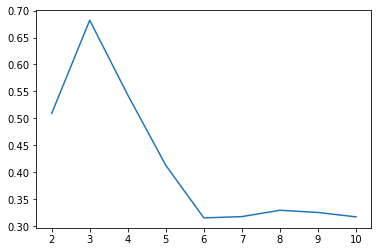

In [11]:
plt.plot(range(2, 11), ss)
plt.show()

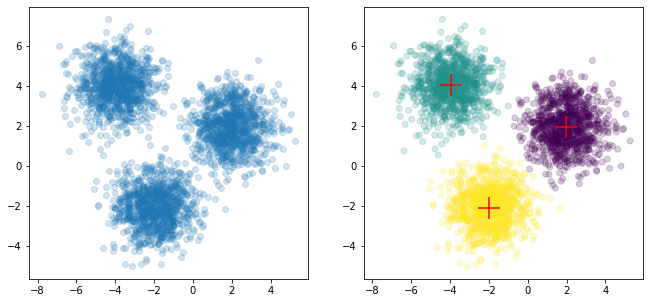

In [12]:
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.2)
axes[1].scatter(X[:,0], X[:,1], c=best_y, alpha=.2)
axes[1].scatter(best_centers[:,0], best_centers[:,1], marker="+", s=500, c='r')
plt.show()